In [136]:
import pandas as pd
import numpy as np

In [137]:
df0 = pd.read_csv("/content/airline-passengers.csv", sep = " ")
df0.dropna(inplace = True) 
df0

,"""Month"",""Passengers"""
0,"""1949-01"",112"
1,"""1949-02"",118"
2,"""1949-03"",132"
3,"""1949-04"",129"
4,"""1949-05"",121"
...,...
139,"""1960-08"",606"
140,"""1960-09"",508"
141,"""1960-10"",461"
142,"""1960-11"",390"


In [138]:
type(df0.iloc[7])

pandas.core.series.Series

In [139]:
df0.dtypes

"Month","Passengers"    object
dtype: object

In [140]:
df1 = df0['"Month","Passengers"'].str.split(",",expand=True,)
df1

,0,1
0,"""1949-01""",112
1,"""1949-02""",118
2,"""1949-03""",132
3,"""1949-04""",129
4,"""1949-05""",121
...,...,...
139,"""1960-08""",606
140,"""1960-09""",508
141,"""1960-10""",461
142,"""1960-11""",390


In [141]:
df2 = df1.rename(columns={0: 'month',1: 'passengers'})
df2

,month,passengers
0,"""1949-01""",112
1,"""1949-02""",118
2,"""1949-03""",132
3,"""1949-04""",129
4,"""1949-05""",121
...,...,...
139,"""1960-08""",606
140,"""1960-09""",508
141,"""1960-10""",461
142,"""1960-11""",390


In [142]:
df2['month'] = df2['month'].str.replace(r'"', '')
df2['month'] = df2['month'] + "-01"

df2['month'] = pd.to_datetime(df2['month'], format="%Y-%m-%d")

df3 = df2.sort_values('month')
df3

,month,passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [143]:
df3.dtypes

month         datetime64[ns]
passengers            object
dtype: object

In [144]:
df3['passengers'] = df3['passengers'].astype('int')
df3.dtypes

month         datetime64[ns]
passengers             int64
dtype: object

In [145]:
type(df2)

pandas.core.frame.DataFrame

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [147]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [148]:
timeseries_data = df3.passengers
timeseries_data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64

In [149]:
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [150]:
print(X),print(y)

[[112 118 132]
 [118 132 129]
 [132 129 121]
 [129 121 135]
 [121 135 148]
 [135 148 148]
 [148 148 136]
 [148 136 119]
 [136 119 104]
 [119 104 118]
 [104 118 115]
 [118 115 126]
 [115 126 141]
 [126 141 135]
 [141 135 125]
 [135 125 149]
 [125 149 170]
 [149 170 170]
 [170 170 158]
 [170 158 133]
 [158 133 114]
 [133 114 140]
 [114 140 145]
 [140 145 150]
 [145 150 178]
 [150 178 163]
 [178 163 172]
 [163 172 178]
 [172 178 199]
 [178 199 199]
 [199 199 184]
 [199 184 162]
 [184 162 146]
 [162 146 166]
 [146 166 171]
 [166 171 180]
 [171 180 193]
 [180 193 181]
 [193 181 183]
 [181 183 218]
 [183 218 230]
 [218 230 242]
 [230 242 209]
 [242 209 191]
 [209 191 172]
 [191 172 194]
 [172 194 196]
 [194 196 196]
 [196 196 236]
 [196 236 235]
 [236 235 229]
 [235 229 243]
 [229 243 264]
 [243 264 272]
 [264 272 237]
 [272 237 211]
 [237 211 180]
 [211 180 201]
 [180 201 204]
 [201 204 188]
 [204 188 235]
 [188 235 227]
 [235 227 234]
 [227 234 264]
 [234 264 302]
 [264 302 293]
 [302 293 

(None, None)

In [151]:
X.shape

(141, 3)

In [152]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [153]:
X.shape

(141, 3, 1)

In [154]:
X.dtype

dtype('int64')

In [155]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
5/5 [==============================] - 0s 14ms/step - loss: 92514.6641
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 84526.3281
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 72316.5547
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 60674.8945
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 45407.7969
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 15565.5459
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 5562.3398
Epoch 8/100
5/5 [==============================] - 0s 15ms/step - loss: 3893.7354
Epoch 9/100
5/5 [==============================] - 0s 15ms/step - loss: 2874.4314
Epoch 10/100
5/5 [==============================] - 0s 16ms/step - loss: 2781.6353
Epoch 11/100
5/5 [==============================] - 0s 13ms/step - loss: 2386.6582
Epoch 12/100
5/5 [==============================] - 0s 15ms/step - loss: 2205.8003
Epoch 1

In [156]:
x_input = np.array([461,390,432])
temp_input=list(x_input)

In [157]:
temp_input[1:]

[390, 432]

In [158]:
# Prediction for next 4 months
x_input = np.array([461,390,432])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<5):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} month input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[460.92627]
1 month input [390.         432.         460.92626953]
1 month output [[463.448]]
2 month input [432.         460.92626953 463.44799805]
2 month output [[464.71927]]
3 month input [460.92627 463.448   464.71927]
3 month output [[482.10773]]
4 month input [463.448   464.71927 482.10773]
4 month output [[487.4938]]
[460.92627, 463.448, 464.71927, 482.10773, 487.4938]


In [159]:
timeseries_data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64

In [160]:
len(timeseries_data)

144

In [161]:
lst_output

[460.92627, 463.448, 464.71927, 482.10773, 487.4938]

In [162]:
import matplotlib.pyplot as plt

In [163]:
month_new=np.arange(1,145)
month_pred=np.arange(145,150)

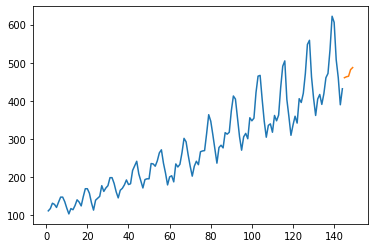

In [164]:
plt.plot(month_new,timeseries_data)
plt.plot(month_pred,lst_output)

In [165]:
df3['passengers'] = df3['passengers'].astype('float32')
df3.dtypes

month         datetime64[ns]
passengers           float32
dtype: object

In [166]:
import math

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import SGD as SGD
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [167]:
np.random.seed(7)
dataset = df3[['passengers']].values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [168]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [169]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [170]:
trainX.shape, trainY.shape

((94, 1, 1), (94,))

In [171]:
trainX

array([[[0.01544401]],

       [[0.02702703]],

       [[0.05405405]],

       [[0.04826255]],

       [[0.03281853]],

       [[0.05984557]],

       [[0.08494207]],

       [[0.08494207]],

       [[0.06177607]],

       [[0.02895753]],

       [[0.        ]],

       [[0.02702703]],

       [[0.02123553]],

       [[0.04247104]],

       [[0.07142857]],

       [[0.05984557]],

       [[0.04054055]],

       [[0.08687258]],

       [[0.12741312]],

       [[0.12741312]],

       [[0.10424709]],

       [[0.05598456]],

       [[0.01930502]],

       [[0.06949806]],

       [[0.07915059]],

       [[0.08880308]],

       [[0.14285713]],

       [[0.11389962]],

       [[0.13127413]],

       [[0.14285713]],

       [[0.18339768]],

       [[0.18339768]],

       [[0.15444016]],

       [[0.11196911]],

       [[0.08108109]],

       [[0.1196911 ]],

       [[0.12934363]],

       [[0.14671814]],

       [[0.17181468]],

       [[0.14864865]],

       [[0.15250966]],

       [[0.22007

In [172]:
trainY

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557,
       0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ,
       0.02702703, 0.02123553, 0.04247104, 0.07142857, 0.05984557,
       0.04054055, 0.08687258, 0.12741312, 0.12741312, 0.10424709,
       0.05598456, 0.01930502, 0.06949806, 0.07915059, 0.08880308,
       0.14285713, 0.11389962, 0.13127413, 0.14285713, 0.18339768,
       0.18339768, 0.15444016, 0.11196911, 0.08108109, 0.1196911 ,
       0.12934363, 0.14671814, 0.17181468, 0.14864865, 0.15250966,
       0.22007722, 0.24324325, 0.26640925, 0.2027027 , 0.16795367,
       0.13127413, 0.17374519, 0.17760617, 0.17760617, 0.25482625,
       0.25289574, 0.24131274, 0.26833975, 0.3088803 , 0.32432434,
       0.25675675, 0.20656371, 0.14671814, 0.18725869, 0.19305018,
       0.16216215, 0.25289574, 0.23745173, 0.25096524, 0.3088803 ,
       0.38223937, 0.36486486, 0.2992278 , 0.24131274, 0.1911197 ,
       0.24131274, 0.26640925, 0.24903473, 0.31467178, 0.31853

In [173]:
# Model 2 - using SGD optimizer

opt = SGD(lr=0.01, momentum=0.9, decay=0.01)

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy','categorical_accuracy'])
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 0s - loss: 0.0000e+00 - accuracy: 0.0106 - categorical_accuracy: 1.0000
Epoch 2/100
94/94 - 0s - loss: 0.0000e+00 - accuracy: 0.0106 - categorical_accuracy: 1.0000
Epoch 3/100
94/94 - 0s - loss: 0.0000e+00 - accuracy: 0.0106 - categorical_accuracy: 1.0000
Epoch 4/100
94/94 - 0s - loss: 0.0000e+00 - accuracy: 0.0106 - categorical_accuracy: 1.0000
Epoch 5/100
94/94 - 0s - loss: 0.0000e+00 - accuracy: 0.0106 - categorical_accuracy: 1.0000
Epoch 6/100
94/94 - 0s - loss: 0.0000e+00 - accuracy: 0.0106 - categorical_accuracy: 1.0000
Epoch 7/100
94/94 - 0s - loss: 0.0000e+00 - accuracy: 0.0106 - categorical_accuracy: 1.0000
Epoch 8/100
94/94 - 0s - loss: 0.0000e+00 - accuracy: 0.0106 - categorical_accuracy: 1.0000
Epoch 9/100
94/94 - 0s - loss: 0.0000e+00 - accuracy: 0.0106 - categorical_accuracy: 1.0000
Epoch 10/100
94/94 - 0s - loss: 0.0000e+00 - accuracy: 0.0106 - categorical_accuracy: 1.0000
Epoch 11/100
94/94 - 0s - loss: 0.0000e+00 - accuracy: 0.0106 - categorical_acc

In [174]:
# make predictions
trainX.shape, testX.shape

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 126.16 RMSE
Test Score: 308.05 RMSE
